In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
from sklearn import svm



C:\Users\ZSY\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

raw_data = loadmat('F:/MachineLearning/MachineLearning_HW_CQUT-master/HW3 SVM/data3.mat')

data_train = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data_train['y'] = raw_data['y']

data_test = pd.DataFrame(raw_data['Xval'], columns=['X1', 'X2'])
data_test['y'] = raw_data['yval']



In [3]:
X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()


In [11]:
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.01, 0.1, 0.5, 1, 5, 10, 30, 100]
gamma_values = [0.01 ,0.1, 0.5, 1, 10, 50, 100]

best_score = 0
best_params = {'kernel': None, 'C': None, 'gamma': None}


In [12]:
for kernel in kernel_values:
    for C in C_values:
        for gamma in gamma_values:
            svc = svm.SVC(kernel=kernel, C=C, gamma=gamma)
            svc.fit(data_train[['X1', 'X2']], data_train['y'])
            score = svc.score(data_test[['X1', 'X2']], data_test['y'])

            if score > best_score:
                best_score = score
                best_params['kernel'] = kernel
                best_params['C'] = C
                best_params['gamma'] = gamma

print(best_score, best_params)


0.965 {'kernel': 'rbf', 'C': 1, 'gamma': 50}


In [13]:
print(best_score, best_params)

0.965 {'kernel': 'rbf', 'C': 1, 'gamma': 50}


In [6]:
svc = svm.SVC(kernel='rbf', C=0.3, gamma=100)
svc.fit(data_train[['X1', 'X2']], data_train['y'])

SVC(C=0.3, gamma=100)

In [7]:
print('验证集准确率：{}%'.format(100*svc.score(data_test[['X1', 'X2']], data_test['y'])))

验证集准确率：96.5%


In [8]:
def visualize_boundary(clf, X, x_min, x_max, y_min, y_max): #x,y轴的取值范围
    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))#在x，y轴上以0.02为间隔，生成网格点
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])#预测每个网格点的类别0/1
    Z = Z.reshape(xx.shape) #转型为网格的形状
    plt.contour(xx, yy,Z, level=[0])  #等高线图 将0/1分界线（决策边界）画出来



C:\Users\ZSY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ZSY\AppData\Local\Temp\ipykernel_11428\4276945603.py:6: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contour(xx, yy,Z, level=[0])  #等高线图 将0/1分界线（决策边界）画出来


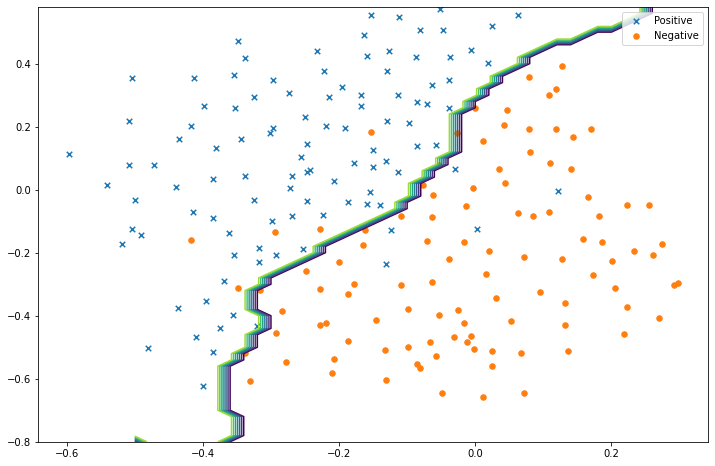

In [9]:
positive = data_train[data_train['y'].isin([1])]
negative = data_train[data_train['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()



visualize_boundary(svc, X, -.5, .3, -.8, .6) #可视化决策边界
